In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("./water_potability.csv")

In [3]:
print(df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
df["ph"].fillna(df["ph"].mean(skipna=True), inplace=True)
df["Sulfate"].fillna(df["Sulfate"].mean(skipna=True), inplace=True)
df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean(skipna=True), inplace=True)

In [5]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
X = df.drop('Potability', axis = 1)
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [39]:
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)
print("Accuracy:", rf_clf.score(X_test, y_test)*100)

Accuracy: 69.20731707317073


In [10]:
lst = list()
for i in range(1, 100):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = i)
    rf_clf = RandomForestClassifier(n_estimators=1000, random_state=i)
    rf_clf.fit(X_train, y_train)
    lst.append(rf_clf.score(X_test, y_test)*100)
lst

[64.63414634146342,
 68.4451219512195,
 67.53048780487805,
 68.75,
 68.59756097560977,
 65.70121951219512,
 66.46341463414635,
 66.92073170731707,
 65.85365853658537,
 69.51219512195121,
 65.2439024390244,
 67.07317073170732,
 66.0060975609756,
 66.3109756097561,
 64.9390243902439,
 69.0548780487805,
 69.66463414634147,
 69.51219512195121,
 69.0548780487805,
 67.53048780487805,
 64.17682926829268,
 67.53048780487805,
 66.3109756097561,
 65.70121951219512,
 66.0060975609756,
 67.98780487804879,
 63.87195121951219,
 70.57926829268293,
 67.07317073170732,
 65.2439024390244,
 67.98780487804879,
 68.59756097560977,
 68.29268292682927,
 68.75,
 69.0548780487805,
 65.70121951219512,
 68.4451219512195,
 66.92073170731707,
 66.15853658536585,
 65.85365853658537,
 69.96951219512195,
 69.20731707317073,
 68.14024390243902,
 68.59756097560977,
 67.53048780487805,
 66.92073170731707,
 68.75,
 68.29268292682927,
 66.46341463414635,
 65.2439024390244,
 65.70121951219512,
 67.22560975609755,
 67.37804

In [11]:
max(lst)

70.88414634146342

In [12]:
lst.index(70.88414634146342)

82

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 83)
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=83)
rf_clf.fit(X_train, y_train)
print("Accuracy:", rf_clf.score(X_test, y_test)*100)

Accuracy: 70.88414634146342


In [49]:
from joblib import dump, load
dump(rf_clf, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [51]:
dst = dict()
for i in range(1,1000):
    rf_clf = RandomForestClassifier(n_estimators=i, random_state=83)
    rf_clf.fit(X_train, y_train)
    acc = rf_clf.score(X_test, y_test)*100
    if acc > 70.884146:
        print("Estimator: ", i, "\t","Accuracy: ", acc)
        dst[i] = acc
dst

Estimator:  94 	 Accuracy:  71.03658536585365
Estimator:  98 	 Accuracy:  71.03658536585365
Estimator:  99 	 Accuracy:  71.34146341463415
Estimator:  100 	 Accuracy:  70.88414634146342
Estimator:  101 	 Accuracy:  71.03658536585365
Estimator:  102 	 Accuracy:  71.03658536585365
Estimator:  103 	 Accuracy:  70.88414634146342
Estimator:  104 	 Accuracy:  71.1890243902439
Estimator:  106 	 Accuracy:  71.03658536585365
Estimator:  108 	 Accuracy:  71.03658536585365
Estimator:  115 	 Accuracy:  70.88414634146342
Estimator:  116 	 Accuracy:  70.88414634146342
Estimator:  134 	 Accuracy:  70.88414634146342
Estimator:  136 	 Accuracy:  71.1890243902439
Estimator:  141 	 Accuracy:  71.1890243902439
Estimator:  144 	 Accuracy:  70.88414634146342
Estimator:  213 	 Accuracy:  71.03658536585365
Estimator:  214 	 Accuracy:  70.88414634146342
Estimator:  255 	 Accuracy:  70.88414634146342


KeyboardInterrupt: 

In [56]:
maxe = dst[100]
newe = 0
for i,j in dst.items():
    if j > dst[i]:
        maxe = j
        
maxe

70.88414634146342

In [17]:
rf_clf = RandomForestClassifier(n_estimators=99, random_state=83)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)*100

71.34146341463415

In [19]:
from joblib import dump, load
dump(rf_clf, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [22]:
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1547,6.217585,203.707222,15597.640883,7.751461,361.247810,452.922025,14.597145,70.850977,4.150167
1019,5.744068,173.850882,28391.998185,7.017330,355.461589,336.061803,16.895180,65.447362,3.171655
1625,7.422225,203.323308,40148.123721,5.602314,256.590451,401.775457,9.025661,53.019585,4.486513
1825,8.552782,217.803318,39030.603705,6.986705,373.746193,340.566245,19.084883,53.856055,2.940848
1565,6.191241,231.322797,29778.357877,4.381097,248.304391,488.954164,13.022135,54.060851,3.315071
...,...,...,...,...,...,...,...,...,...
418,5.381408,175.574307,15371.999944,7.457245,312.354938,308.729798,12.178940,66.396293,4.364067
1668,10.067633,144.613956,39716.131804,4.503366,390.910328,415.050756,17.658794,66.396293,3.776789
2800,7.893313,220.348320,14444.289598,8.037400,300.152172,339.066071,18.423634,67.009098,4.097360
1667,7.380105,237.922637,16862.543476,7.101817,306.182925,478.654518,13.254475,92.864557,5.030452


In [24]:
rf_clf.predict([[6.2,203,15597,7,361,452,14,70,4]], columns = X_test.columns)

TypeError: predict() got an unexpected keyword argument 'columns'

In [25]:
new_df = pd.DataFrame({'ph': [1], 'Hardness': [4], 'Solids': [7], 'Chloramines':[5], 'Sulfate':[3], 'Conductivity':[1], 'Organic_carbon':[3], 'Trihalomethanes':[2], 'Turbidity':[6]})

In [26]:
new_X = np.array(new_df)

In [27]:
new_X

array([[1, 4, 7, 5, 3, 1, 3, 2, 6]], dtype=int64)

In [31]:
print(rf_clf.predict(new_X))

[0]


In [29]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
model = load("random_forest_model.joblib")
model.predict(new_X)

array([0], dtype=int64)

In [34]:
pred = model.predict(new_X)

In [37]:
print(int(pred))

0


In [39]:
float(7.16)

7.16

In [40]:
isinstance(1.0, float)

True

In [41]:
float(7)

7.0

In [60]:
model_rf = RandomForestClassifier(n_estimators=99, random_state=83)

In [61]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=99, random_state=83)

In [62]:
pred_rf = model_rf.predict(X_test)

In [64]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75       397
           1       0.61      0.35      0.45       259

    accuracy                           0.66       656
   macro avg       0.64      0.60      0.60       656
weighted avg       0.65      0.66      0.63       656



<Axes: >

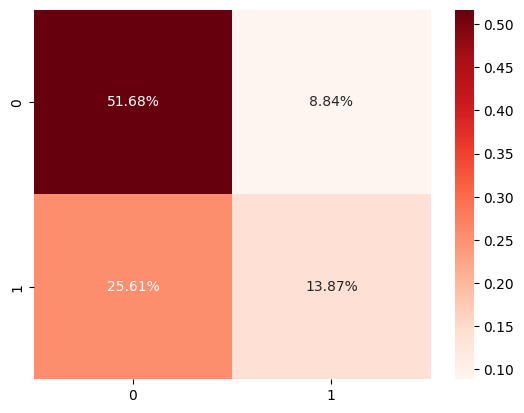

In [65]:
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')